In [38]:
#Load the Data
import pandas as pd

# Load the dataset
data = pd.read_csv('terrorism_updt.csv')

# Display the first few rows of the dataset
data.head()

,Country,Code,Year,Terrorist attacks
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,1
4,Afghanistan,AFG,1974,0


In [39]:

# Display basic information about the dataset
data.info()

# Summary statistics of the dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9263 entries, 0 to 9262
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            9263 non-null   object
 1   Code               9263 non-null   object
 2   Year               9263 non-null   int64 
 3   Terrorist attacks  9263 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 289.6+ KB


,Year,Terrorist attacks
count,9263.000000,9263.000000
mean,1996.283386,44.578538
std,15.084256,430.850979
min,1970.000000,0.000000
25%,1983.000000,0.000000
50%,1997.000000,0.000000
75%,2009.000000,4.000000
max,2021.000000,16820.000000


In [40]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Country              0
Code                 0
Year                 0
Terrorist attacks    0
dtype: int64


In [41]:
# Check for duplicate rows
duplicates=data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicate rows
data = data.drop_duplicates()

Number of duplicate rows: 0


In [42]:
# Create a separate dataset excluding rows with zero terrorist attacks for predictive modeling
predictive_data = data[data['Terrorist attacks'] > 0]

# Retain zero values for trend analysis
trend_data = data.copy()


In [43]:
# Convert 'Year' to integer
data['Year'] = data['Year'].astype(int)

# Convert 'Terrorist attacks' to integer
data['Terrorist attacks'] = data['Terrorist attacks'].astype(int)

In [44]:
# Strip leading/trailing spaces in 'Country' and 'Code'
data['Country'] = data['Country'].str.strip()
data['Code'] = data['Code'].str.strip()

# Ensure consistent case 
data['Country'] = data['Country'].str.upper()
data['Code'] = data['Code'].str.upper()


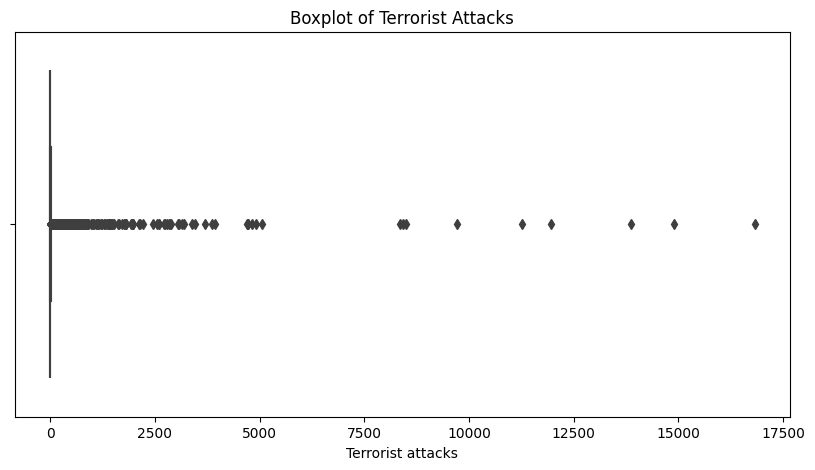

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Terrorist attacks'])
plt.title('Boxplot of Terrorist Attacks')
plt.show()

threshold = data['Terrorist attacks'].quantile(0.99)
data['Terrorist attacks'] = data['Terrorist attacks'].apply(lambda x: min(x, threshold))


In [46]:
# Save the cleaned datasets
data.to_csv('cleaned_terrorism_data.csv', index=False)
predictive_data.to_csv('predictive_terrorism_data.csv', index=False)
trend_data.to_csv('trend_terrorism_data.csv', index=False)


In [47]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
df.head()

,Country,Code,Year,Terrorist attacks
0,AFGHANISTAN,AFG,1970,0.0
1,AFGHANISTAN,AFG,1971,0.0
2,AFGHANISTAN,AFG,1972,0.0
3,AFGHANISTAN,AFG,1973,1.0
4,AFGHANISTAN,AFG,1974,0.0


In [48]:
# Total terrorist attacks by country
total_attacks = df.groupby('Country')['Terrorist attacks'].sum()
print(total_attacks)


Country
AFGHANISTAN            10045.0
ALBANIA                   83.0
ALGERIA                 2754.0
ANDORRA                    1.0
ANGOLA                   501.0
                        ...   
YEMEN                   5775.8
YEMEN ARAB REPUBLIC        6.0
YUGOSLAVIA               203.0
ZAMBIA                    63.0
ZIMBABWE                 106.0
Name: Terrorist attacks, Length: 196, dtype: float64


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [50]:
# Check the unique countries in the dataset
unique_countries = data['Country'].unique()
print(f"Number of unique countries: {len(unique_countries)}")
print(f"Unique countries: {unique_countries}")

Number of unique countries: 196
Unique countries: ['AFGHANISTAN' 'ALBANIA' 'ALGERIA' 'ANDORRA' 'ANGOLA'
 'ANTIGUA AND BARBUDA' 'ARGENTINA' 'ARMENIA' 'AUSTRALIA' 'AUSTRIA'
 'AZERBAIJAN' 'BAHAMAS' 'BAHRAIN' 'BANGLADESH' 'BARBADOS' 'BELARUS'
 'BELGIUM' 'BELIZE' 'BENIN' 'BHUTAN' 'BOLIVIA' 'BOSNIA AND HERZEGOVINA'
 'BOTSWANA' 'BRAZIL' 'BRUNEI' 'BULGARIA' 'BURKINA FASO' 'BURUNDI'
 'CAMBODIA' 'CAMEROON' 'CANADA' 'CENTRAL AFRICAN REPUBLIC' 'CHAD' 'CHILE'
 'CHINA' 'COLOMBIA' 'COMOROS' 'COSTA RICA' "COTE D'IVOIRE" 'CROATIA'
 'CUBA' 'CYPRUS' 'CZECHIA' 'CZECHOSLOVAKIA' 'DEMOCRATIC REPUBLIC OF CONGO'
 'DENMARK' 'DJIBOUTI' 'DOMINICA' 'DOMINICAN REPUBLIC' 'EAST GERMANY'
 'EAST TIMOR' 'ECUADOR' 'EGYPT' 'EL SALVADOR' 'EQUATORIAL GUINEA'
 'ERITREA' 'ESTONIA' 'ESWATINI' 'ETHIOPIA' 'FALKLAND ISLANDS' 'FIJI'
 'FINLAND' 'FRANCE' 'FRENCH GUIANA' 'FRENCH POLYNESIA' 'GABON' 'GAMBIA'
 'GEORGIA' 'GERMANY' 'GHANA' 'GREECE' 'GRENADA' 'GUADELOUPE' 'GUATEMALA'
 'GUINEA' 'GUINEA-BISSAU' 'GUYANA' 'HAITI' 'HONDURAS' 'H

C:\Users\Shreya Kolte\AppData\Local\Temp\ipykernel_5456\894639277.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = filtered_data['Year'].astype(int)
C:\Users\Shreya Kolte\AppData\Local\Temp\ipykernel_5456\894639277.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Terrorist attacks'] = filtered_data['Terrorist attacks'].astype(int)


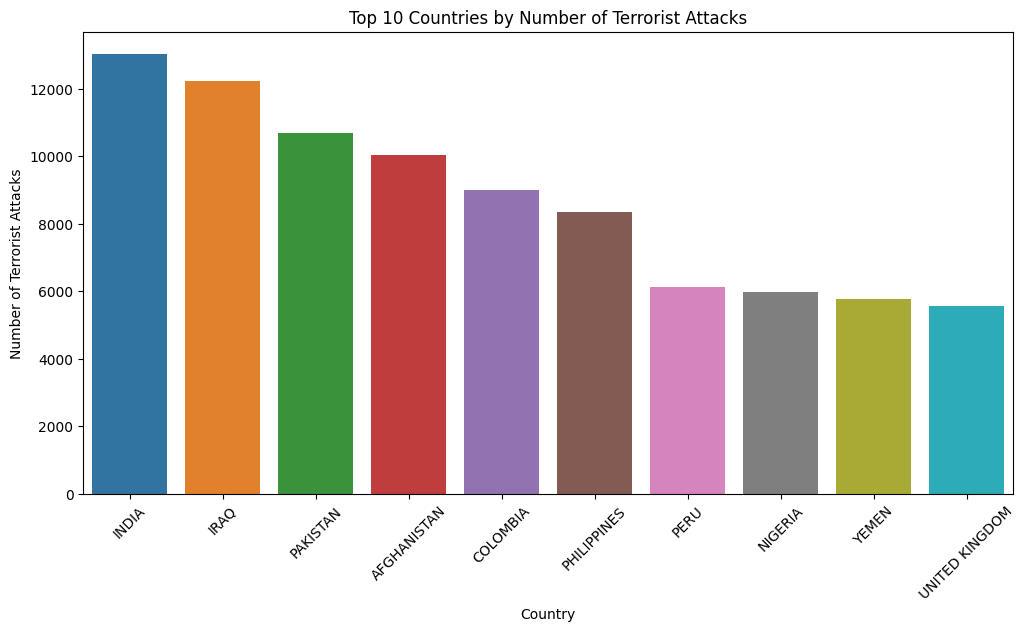

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of non-country entries to exclude
non_countries = ['WORLD', 'CZECHOSLOVAKIA', 'EAST GERMANY', 'YEMEN ARAB REPUBLIC', 'SERBIA AND MONTENEGRO', 'WEST GERMANY', 'YUGOSLAVIA']

# Filter out non-country entries
filtered_data = data[~data['Country'].isin(non_countries)]

# Ensure the columns are properly formatted
filtered_data['Year'] = filtered_data['Year'].astype(int)
filtered_data['Terrorist attacks'] = filtered_data['Terrorist attacks'].astype(int)

# Group by country and sum the terrorist attacks
top_countries_filtered = filtered_data.groupby('Country')['Terrorist attacks'].sum().sort_values(ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_filtered.index, y=top_countries_filtered.values)
plt.title('Top 10 Countries by Number of Terrorist Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Terrorist Attacks')
plt.xticks(rotation=45)
plt.show()


In [54]:

# Create a new column for 5-year intervals
filtered_data['Year Interval'] = (filtered_data['Year'] // 5) * 5


C:\Users\Shreya Kolte\AppData\Local\Temp\ipykernel_5456\2206478060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year Interval'] = (filtered_data['Year'] // 5) * 5


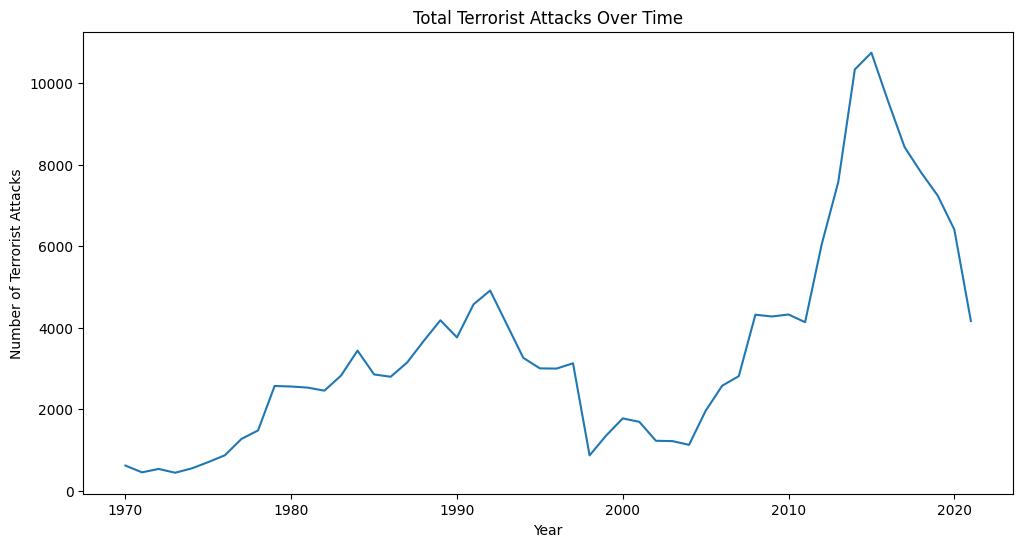

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns


# Aggregate the data by year
time_series_data = filtered_data.groupby('Year')['Terrorist attacks'].sum()

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(time_series_data)
plt.title('Total Terrorist Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Terrorist Attacks')
plt.show()



E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this meth

                               SARIMAX Results                                
Dep. Variable:      Terrorist attacks   No. Observations:                   51
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -407.130
Date:                Mon, 26 Aug 2024   AIC                            820.260
Time:                        16:43:43   BIC                            825.996
Sample:                             0   HQIC                           822.444
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3737      0.338      1.107      0.268      -0.288       1.036
ma.L1         -0.0247      0.398     -0.062      0.950      -0.805       0.755
sigma2      6.908e+05   1.11e+05      6.242      0.0

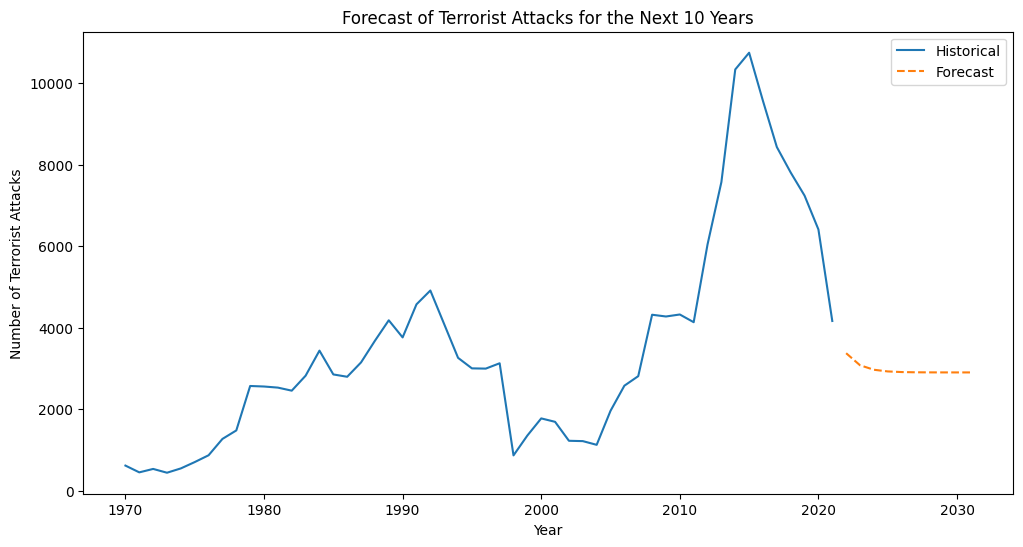

In [57]:
# Train the ARIMA model
# Order (p, d, q) can be tuned; (1, 1, 1) is a starting point
model = ARIMA(time_series_data, order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast future values
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)  # Forecasting the next 10 years

# Create forecast index
forecast_index = list(range(time_series_data.index[-1] + 1, time_series_data.index[-1] + 1 + forecast_steps))

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Historical')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--')
plt.title('Forecast of Terrorist Attacks for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Number of Terrorist Attacks')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools

# Define a function to evaluate the ARIMA model
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    error = mean_squared_error(test, forecast)
    return error


In [59]:

# Define a function to evaluate different ARIMA configurations
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p, d, q in itertools.product(p_values, d_values, q_values):
        order = (p, d, q)
        try:
            mse = evaluate_arima_model(dataset, order)
            if mse < best_score:
                best_score, best_cfg = mse, order
            print(f'ARIMA{order} MSE={mse:.3f}')
        except:
            continue
    print(f'Best ARIMA{best_cfg} MSE={best_score:.3f}')

In [60]:
# Set the parameters to try
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Evaluate different models
evaluate_models(time_series_data, p_values, d_values, q_values)

E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this meth

ARIMA(0, 0, 0) MSE=30673553.565
ARIMA(0, 0, 1) MSE=30422955.334


E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupp

ARIMA(0, 0, 2) MSE=30188040.546
ARIMA(0, 1, 0) MSE=14555492.273
ARIMA(0, 1, 1) MSE=14557141.659
ARIMA(0, 1, 2) MSE=14573747.683


E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupp

ARIMA(1, 0, 0) MSE=21135820.834
ARIMA(1, 0, 1) MSE=21951335.767


E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupp

ARIMA(1, 0, 2) MSE=21813303.082
ARIMA(1, 1, 0) MSE=14556905.285
ARIMA(1, 1, 1) MSE=14129556.141


E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupp

ARIMA(1, 1, 2) MSE=12551843.636
ARIMA(2, 0, 0) MSE=21993239.815


E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupp

ARIMA(2, 0, 1) MSE=21718994.687


E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

ARIMA(2, 0, 2) MSE=21843773.159
ARIMA(2, 1, 0) MSE=14559588.168
ARIMA(2, 1, 1) MSE=14432946.280
ARIMA(2, 1, 2) MSE=14181668.143
Best ARIMA(1, 1, 2) MSE=12551843.636


E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [61]:
# Calculate and print evaluation metrics for the chosen model
train_size = int(len(time_series_data) * 0.8)
train, test = time_series_data[0:train_size], time_series_data[train_size:]
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')

MAE: 3187.830
MSE: 14129556.141
RMSE: 3758.930


E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\Anaconda\ANACONDA\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero